# Setup

## Device

In [1]:
import torch

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


# Data preparation

## Load data

In [2]:
from data import load_data

train_path = './data/train_data.csv'
test_path = './data/test_data.csv'

X_train_all, y_train_all = load_data(train_path, target='SalePrice')
X_test, _ = load_data(test_path)

X_train_all.head()

,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0
1,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
2,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
3,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
4,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0


## Preprocess data

### Split data

In [3]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size=0.2, random_state=42)

print("Size of training set: ", X_train.shape)
print("Size of validation set: ", X_val.shape)

Size of training set:  (3299, 16)
Size of validation set:  (825, 16)


### Polynomial features

In [4]:
# from data import polynomial_expansion
# import numpy as np

# numeric_features = ['Floor', 'N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)']
# numeric_features = X_train_all.select_dtypes(include=np.number).columns.tolist()

# X_train_poly = polynomial_expansion(X_train, numeric_features, degree=2)
# X_val_poly = polynomial_expansion(X_val, numeric_features, degree=2)

# X_train_poly.head()

### Categorical features

In [5]:
categorical_cols = X_train_all.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X_train_all.select_dtypes(include=['float64', 'int64']).columns.tolist()

categorical_indices = [X_train_all.columns.get_loc(col) for col in categorical_cols]
numeric_indices = [X_train_all.columns.get_loc(col) for col in numeric_cols]

print("Categorical cols: ", categorical_cols)
print("Numeric cols: ", numeric_cols)

Categorical cols:  ['HallwayType', 'HeatingType', 'AptManageType', 'TimeToBusStop', 'TimeToSubway', 'SubwayStation']
Numeric cols:  ['YearBuilt', 'Size(sqf)', 'Floor', 'N_Parkinglot(Ground)', 'N_Parkinglot(Basement)', 'N_manager', 'N_elevators', 'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)']


In [6]:
from data import one_hot_encode

X_train_oh = X_train.copy()
X_val_oh = X_val.copy()
X_test_oh = X_test.copy()

for col in categorical_cols:
    X_train_oh = one_hot_encode(X_train_oh, col)
    X_val_oh = one_hot_encode(X_val_oh, col)
    X_test_oh = one_hot_encode(X_test_oh, col)

X_train_oh.head()

,YearBuilt,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_manager,N_elevators,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),...,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby
3162,1993,914,9,523.0,536.0,8.0,20.0,4,14.0,17.0,...,False,False,False,False,False,False,False,True,False,False
2514,2007,868,24,0.0,1270.0,14.0,16.0,10,9.0,10.0,...,False,False,False,False,False,False,True,False,False,False
1894,2006,1149,18,249.0,536.0,5.0,11.0,5,3.0,7.0,...,False,False,False,False,False,False,False,False,True,False
3612,2005,914,12,67.0,798.0,6.0,0.0,7,13.0,15.0,...,True,False,True,False,False,False,False,False,False,False
3349,2013,644,3,8.0,930.0,6.0,14.0,7,9.0,11.0,...,False,False,False,False,False,False,True,False,False,False


In [7]:
from data import index_encode

X_train_ie = X_train.copy()
X_val_ie = X_val.copy()
X_test_ie = X_test.copy()

for col in categorical_cols:
    X_train_ie, mappings = index_encode(X_train_ie, col)
    X_val_ie, _ = index_encode(X_val_ie, col, mappings=mappings)
    X_test_ie, _ = index_encode(X_test_ie, col, mappings=mappings)

X_train_ie.head()

,YearBuilt,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_manager,N_elevators,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),HallwayType,HeatingType,AptManageType,TimeToBusStop,TimeToSubway,SubwayStation
3162,1993,914,9,523.0,536.0,8.0,20.0,4,14.0,17.0,0,0,0,0,0,0
2514,2007,868,24,0.0,1270.0,14.0,16.0,10,9.0,10.0,1,0,0,0,1,1
1894,2006,1149,18,249.0,536.0,5.0,11.0,5,3.0,7.0,1,0,0,0,1,2
3612,2005,914,12,67.0,798.0,6.0,0.0,7,13.0,15.0,0,0,0,0,2,3
3349,2013,644,3,8.0,930.0,6.0,14.0,7,9.0,11.0,1,0,0,0,1,1


### Standardize numerical features

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[numeric_cols])

X_train_oh[numeric_cols] = scaler.transform(X_train_oh[numeric_cols])
X_val_oh[numeric_cols] = scaler.transform(X_val_oh[numeric_cols])
X_test_oh[numeric_cols] = scaler.transform(X_test_oh[numeric_cols])

X_train_ie[numeric_cols] = scaler.transform(X_train_ie[numeric_cols])
X_val_ie[numeric_cols] = scaler.transform(X_val_ie[numeric_cols])
X_test_ie[numeric_cols] = scaler.transform(X_test_ie[numeric_cols])

### Upsample minority classes

In [9]:
class_distribution = y_train.value_counts(normalize=True)
class_distribution

SalePrice
1    0.726887
2    0.140042
0    0.133071
Name: proportion, dtype: float64

In [10]:
# TODO: maybe use SMOTE?

# from imblearn.over_sampling import SMOTE
# import numpy as np

# smote = SMOTE()
# X_train, y_train = smote.fit_resample(X_train, y_train)

# print("After SMOTE:", np.bincount(y_train))

### Datasets

In [11]:
class_weights = { 0: 1 / class_distribution[0], 1: 1 / class_distribution[1], 2: 1 / class_distribution[2] }

# TODO: remove

# class_weights[0] *= 2
# class_weights[2] *= 2

class_weights

{0: np.float64(7.514806378132118),
 1: np.float64(1.3757297748123436),
 2: np.float64(7.140692640692641)}

In [12]:
# convert all non-numeric values to float32

X_train_oh = X_train_oh.values.astype('float32')
X_val_oh = X_val_oh.values.astype('float32')
X_test_oh = X_test_oh.values.astype('float32')

X_train_ie = X_train_ie.values.astype('float32')
X_val_ie = X_val_ie.values.astype('float32')
X_test_ie = X_test_ie.values.astype('float32')

In [13]:
from data import to_dataloader

train_loader_oh = to_dataloader(X_train_oh, y_train.values, batch_size=1024, class_weights=class_weights)
val_loader_oh = to_dataloader(X_val_oh, y_val.values)

train_loader_ie = to_dataloader(X_train_ie, y_train.values, batch_size=1024, class_weights=class_weights)
val_loader_ie = to_dataloader(X_val_ie, y_val.values)

In [14]:
vector_size_oh = X_train_oh.shape[1]
vector_size_ie = X_train_ie.shape[1]

print("Vector size (one-hot encoded): ", vector_size_oh)
print("Vector size (index encoded): ", vector_size_ie)

Vector size (one-hot encoded):  33
Vector size (index encoded):  16


In [15]:
num_classes = len(class_distribution)

print("Number of classes: ", num_classes)

Number of classes:  3


# Model

In [16]:
import torch.nn as nn

class DefaultNeuralNetwork(nn.Module):
    def __init__(self, 
                 input_size: int, 
                 output_size: int = 1, 
                 hidden_size: int = 1024,
                 dropout: float = 0.2):
        super().__init__()

        self.seq = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, output_size),
            # nn.Sigmoid()
        )

    def forward(self, x):
        return self.seq(x)

In [59]:
import numpy as np
import torch
import torch.nn as nn

def get_unique_features(X, index, multiplier=2):
    return np.unique(X[:, index]).shape[0] * multiplier

class EmbeddingNeuralNetwork(nn.Module):
    def __init__(self, 
                 base_input_size: int, 
                 output_size: int = 1,
                 hidden_size: int = 1024,
                 embedding_dim: int = 32,
                 dropout: float = 0.2):
        super().__init__()

        self.embeddings = nn.ModuleDict({
            str(feature): nn.Embedding(get_unique_features(X_train_ie, feature), embedding_dim)
            for feature in categorical_indices
        })

        input_size = base_input_size + len(categorical_indices) * (embedding_dim - 1)

        self.seq = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, output_size),
            # nn.Sigmoid()  # Uncomment if needed.
        )

    def forward(self, x: list):
        numerical = x[:, numeric_indices].float()
        embedded_features = []
        
        for feature in categorical_indices:
            cat_column = x[:, feature].long()
            emb = self.embeddings[str(feature)](cat_column)
            embedded_features.append(emb)

        embedded = torch.cat(embedded_features, dim=1)
        x_combined = torch.cat([numerical, embedded], dim=1)

        return self.seq(x_combined)

# Experiments

In [18]:
def ordinal_loss(preds, targets, weights=(0.5, 2)):
    target1 = (targets > 0).float()
    target2 = (targets > 1).float()

    target1_weight, target2_weight = weights

    loss1 = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(target1_weight))(preds[:, 0], target1)
    loss2 = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(target2_weight))(preds[:, 1], target2)

    return loss1 + loss2


### Smaller networks

In [33]:
class SmallDefaultNeuralNetwork(nn.Module):
    def __init__(self, input_size: int, layer_size: int = 1024, output_size: int = 1, dropout: float = 0.2):
        super().__init__()

        self.seq = nn.Sequential(
            nn.Linear(input_size, layer_size),
            nn.BatchNorm1d(layer_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            nn.Linear(layer_size, layer_size),
            nn.BatchNorm1d(layer_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            nn.Linear(layer_size, layer_size),
            nn.BatchNorm1d(layer_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            # nn.Linear(layer_size, layer_size),
            # nn.BatchNorm1d(layer_size),
            # nn.LeakyReLU(),
            # nn.Dropout(dropout),
            nn.Linear(layer_size, output_size),
            # nn.Sigmoid()
        )

    def forward(self, x):
        return self.seq(x)


class SmallEmbeddingNeuralNetwork(nn.Module):
    def __init__(self, base_input_size: int, layer_size: int = 1024, output_size: int = 1, dropout: float = 0.2):
        super().__init__()

        embedding_dim = 32
        self.embeddings = nn.ModuleDict({
            str(feature): nn.Embedding(get_unique_features(X_train, feature), embedding_dim)
            for feature in categorical_indices
        })

        input_size = base_input_size + len(categorical_indices) * (embedding_dim - 1)

        self.seq = nn.Sequential(
            nn.Linear(input_size, layer_size),
            nn.BatchNorm1d(layer_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            nn.Linear(layer_size, layer_size),
            nn.BatchNorm1d(layer_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            nn.Linear(layer_size, layer_size),
            nn.BatchNorm1d(layer_size),
            nn.LeakyReLU(),
            nn.Dropout(dropout),
            # nn.Linear(layer_size, layer_size),
            # nn.BatchNorm1d(layer_size),
            # nn.LeakyReLU(),
            # nn.Dropout(dropout),
            nn.Linear(layer_size, output_size),
            # nn.Sigmoid()  # Uncomment if needed.
        )

    def forward(self, x: list):
        numerical = x[:, numeric_indices].float()
        embedded_features = []
        
        for feature in categorical_indices:
            cat_column = x[:, feature].long()
            emb = self.embeddings[str(feature)](cat_column)
            embedded_features.append(emb)

        embedded = torch.cat(embedded_features, dim=1)
        x_combined = torch.cat([numerical, embedded], dim=1)

        return self.seq(x_combined)

In [54]:
from train import Trainer, predict
from utils import pred_to_class
from plots import plot_pred_acc

layer_sizes = [256, 512, 1024, 2048]
dropouts = [0.1, 0.2, 0.3]

for layer_size in layer_sizes:
    for dropout in dropouts:
        nn_model = DefaultNeuralNetwork(vector_size_oh, layer_size=layer_size, output_size=num_classes-1, dropout=dropout)
        small_model = SmallDefaultNeuralNetwork(vector_size_oh, layer_size=layer_size, output_size=num_classes-1, dropout=dropout)
        models = [nn_model, small_model]
        trainers = [train_loader_ie, train_loader_oh]
        vals = [val_loader_ie, val_loader_oh]
        Xs = [X_val_ie, X_val_oh]
        for model in models:
            for i, trainer in enumerate(trainers):
                optim = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=2e-1)
                scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, patience=5, factor=0.1, verbose=True)
                criterion = ordinal_loss

                trainer = Trainer(model)
                trainer.to_device(device)
                trainer.compile(optimizer=optim, criterion=criterion, scheduler=scheduler)

                trainer.fit(trainer, vals[i], epochs=100, print_progress=False)
                y_pred_nn = predict(model, Xs[i], device)
                y_pred_nn = pred_to_class(y_pred_nn, threshold=0.5)
                plot_pred_acc(y_val, y_pred_nn)


TypeError: object of type 'Trainer' has no len()

## Default NN

In [19]:
from train import Trainer
from plots import plot_results_over_params

### Learning rate

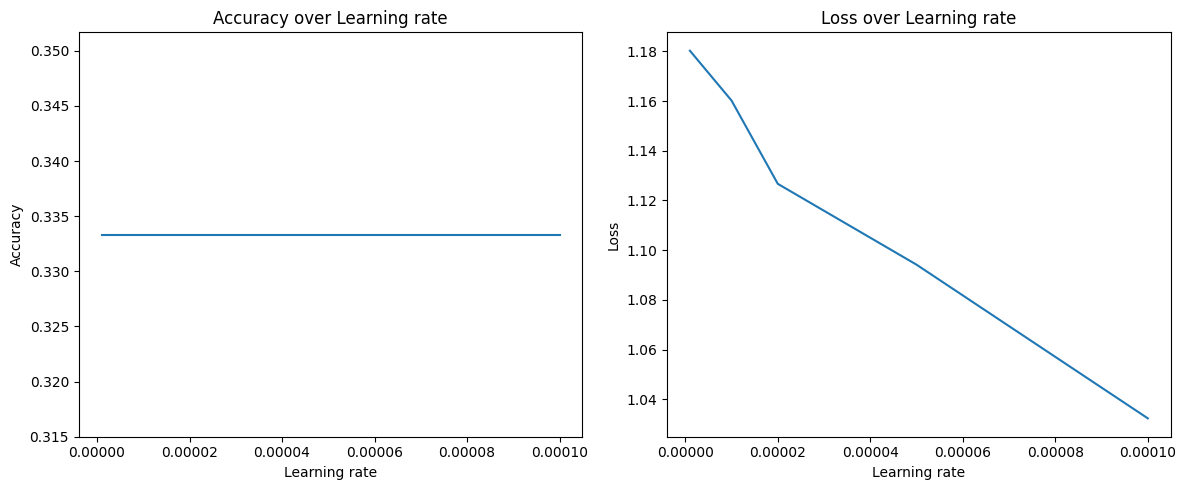

In [ ]:
lr_rates = sorted([1e-4, 1e-5, 2e-5, 5e-5, 1e-6])
epochs = 100
weight_decay = 2e-1

criterion = ordinal_loss
results = []

for lr_rate in lr_rates:
    model = DefaultNeuralNetwork(input_size=vector_size_oh, output_size=num_classes-1, dropout=0.1)
    optim = torch.optim.AdamW(model.parameters(), lr=lr_rate, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, patience=5, factor=0.1)

    trainer = Trainer(model)
    trainer.to_device(device)
    trainer.compile(optimizer=optim, criterion=criterion, scheduler=scheduler)
    trainer.set_verbose(False)

    result = trainer.fit(train_loader_oh, val_loader_oh, epochs=epochs)
    results.append(result)

plot_results_over_params(lr_rates, np.array(results), "Learning rate")

### Weight decay

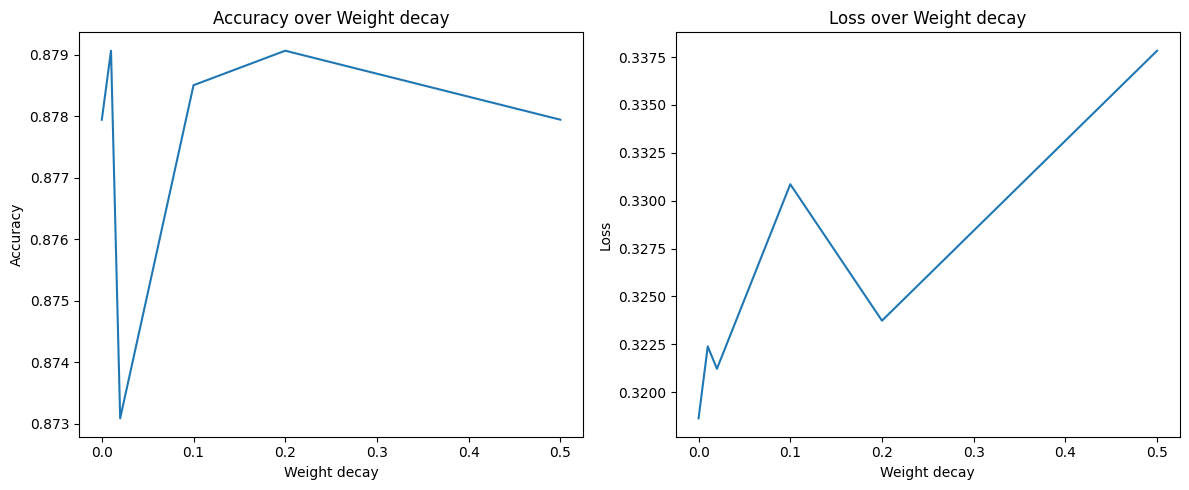

In [34]:
lr = 2e-5 # wyznaczony na podstawie poprzedniego eksperymentu
weight_decays = sorted([0.0, 1e-1, 2e-1, 5e-1, 1e-2, 2e-2])
criterion = ordinal_loss
epochs = 100

results = []

for weight_decay in weight_decays:
    model = DefaultNeuralNetwork(input_size=vector_size_oh, output_size=num_classes-1, dropout=0.1)
    optim = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, patience=5, factor=0.1)

    trainer = Trainer(model)
    trainer.to_device(device)
    trainer.compile(optimizer=optim, criterion=criterion, scheduler=scheduler)
    trainer.set_verbose(False)

    result = trainer.fit(train_loader_oh, val_loader_oh, epochs=epochs)
    results.append(result)

plot_results_over_params(weight_decays, np.array(results), "Weight decay")

### Dropout

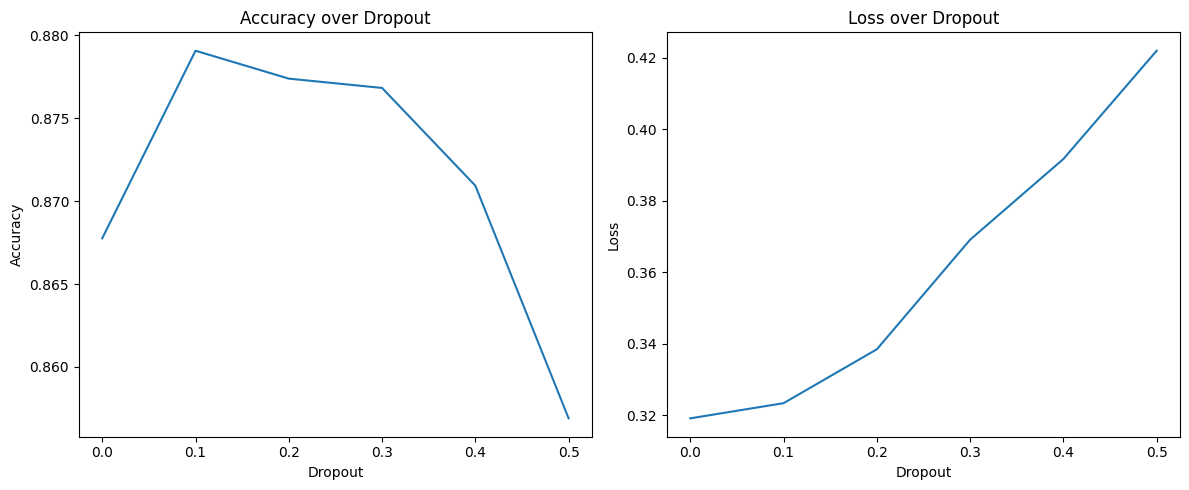

In [ ]:
lr=2e-5
weight_decay=2e-1
dropouts = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
epochs = 100

results = []

for dropout in dropouts:
    model = DefaultNeuralNetwork(input_size=vector_size_oh, output_size=num_classes-1, dropout=dropout)
    optim = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, patience=5, factor=0.1)

    trainer = Trainer(model)
    trainer.to_device(device)
    trainer.compile(optimizer=optim, criterion=criterion, scheduler=scheduler)
    trainer.set_verbose(False)

    result = trainer.fit(train_loader_oh, val_loader_oh, epochs=epochs)
    results.append(result)

plot_results_over_params(dropouts, np.array(results), "Dropout")

### Schedulers

#### ReduceLROnPlateau

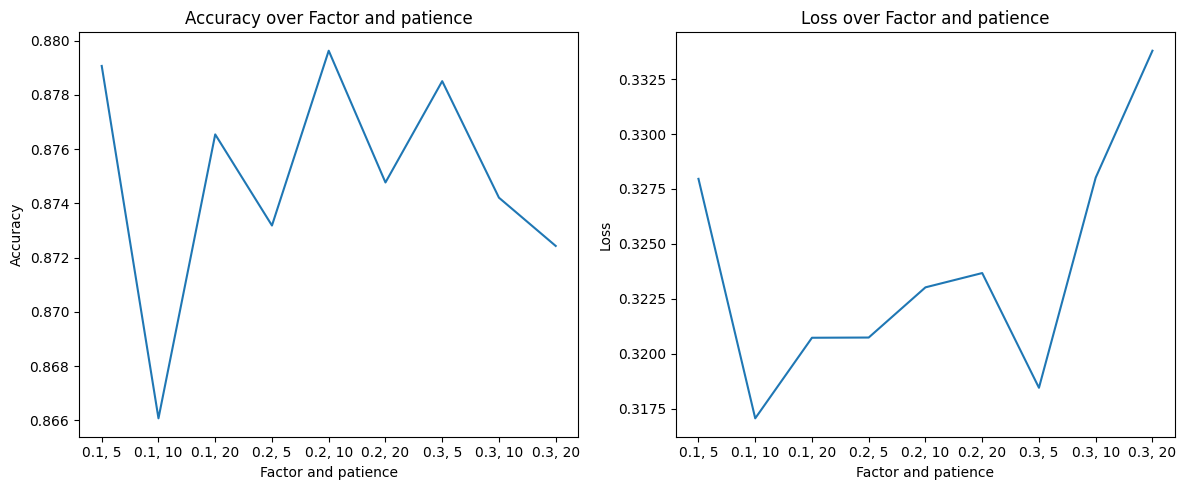

In [43]:
lr=2e-5
weight_decay=1e-1
dropout = 0.1
epochs = 100
factor_patience = [(0.1, 5), (0.1, 10), (0.1, 20), (0.2, 5), (0.2, 10), (0.2, 20), (0.3, 5), (0.3, 10), (0.3, 20)]

results = []
for factor, patience in factor_patience:
    model = DefaultNeuralNetwork(input_size=vector_size_oh, output_size=num_classes-1, dropout=dropout)
    optim = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, patience=patience, factor=factor)

    trainer = Trainer(model)
    trainer.to_device(device)
    trainer.compile(optimizer=optim, criterion=criterion, scheduler=scheduler)
    trainer.set_verbose(False)

    result = trainer.fit(train_loader_oh, val_loader_oh, epochs=epochs)
    results.append(result)

plot_results_over_params([f"{factor}, {patiance}" for factor, patiance in factor_patience], np.array(results), "Factor and patience")

#### StepLR

/Users/grzegorzstatkiewicz/Documents/studies/ssne/.venv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:243: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


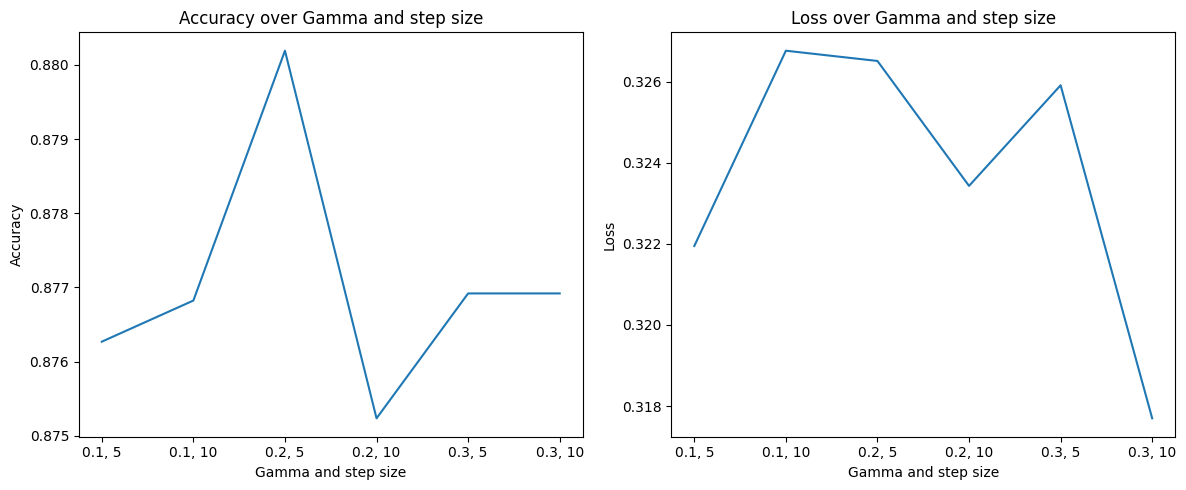

In [168]:
lr = 2e-5
weight_decay = 1e-1
dropout = 0.1
epochs = 100
gamma_step = [(0.1, 5), (0.1, 10), (0.2, 5), (0.2, 10), (0.3, 5), (0.3, 10)]

results = []
for gamma, step_size in gamma_step:
    model = DefaultNeuralNetwork(input_size=vector_size_oh, output_size=num_classes-1, dropout=dropout)
    optim = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.StepLR(optim, step_size=step_size, gamma=gamma)

    trainer = Trainer(model)
    trainer.to_device(device)
    trainer.compile(optimizer=optim, criterion=criterion, scheduler=scheduler)
    trainer.set_verbose(False)

    result = trainer.fit(train_loader_oh, val_loader_oh, epochs=epochs)
    results.append(result)

plot_results_over_params([f"{gamma}, {step_size}" for gamma, step_size in gamma_step], np.array(results), "Gamma and step size")

### Best Default NN

Epoch  1/100 - Train Loss: 1.12 - Val Loss: 1.17 - Val Acc: 0.3333 - LR: 2e-05
Epoch  2/100 - Train Loss: 0.95 - Val Loss: 1.12 - Val Acc: 0.3333 - LR: 2e-05
Epoch  3/100 - Train Loss: 0.88 - Val Loss: 1.06 - Val Acc: 0.3333 - LR: 2e-05
Epoch  4/100 - Train Loss: 0.81 - Val Loss: 0.98 - Val Acc: 0.3471 - LR: 2e-05
Epoch  5/100 - Train Loss: 0.76 - Val Loss: 0.89 - Val Acc: 0.6560 - LR: 2e-05
Epoch  6/100 - Train Loss: 0.72 - Val Loss: 0.81 - Val Acc: 0.7621 - LR: 2e-05
Epoch  7/100 - Train Loss: 0.69 - Val Loss: 0.75 - Val Acc: 0.8022 - LR: 2e-05
Epoch  8/100 - Train Loss: 0.67 - Val Loss: 0.69 - Val Acc: 0.8120 - LR: 2e-05
Epoch  9/100 - Train Loss: 0.65 - Val Loss: 0.64 - Val Acc: 0.8143 - LR: 2e-05
Epoch 10/100 - Train Loss: 0.63 - Val Loss: 0.61 - Val Acc: 0.8244 - LR: 2e-05
Epoch 11/100 - Train Loss: 0.64 - Val Loss: 0.58 - Val Acc: 0.8272 - LR: 2e-05
Epoch 12/100 - Train Loss: 0.61 - Val Loss: 0.56 - Val Acc: 0.8333 - LR: 2e-05
Epoch 13/100 - Train Loss: 0.60 - Val Loss: 0.55 - V

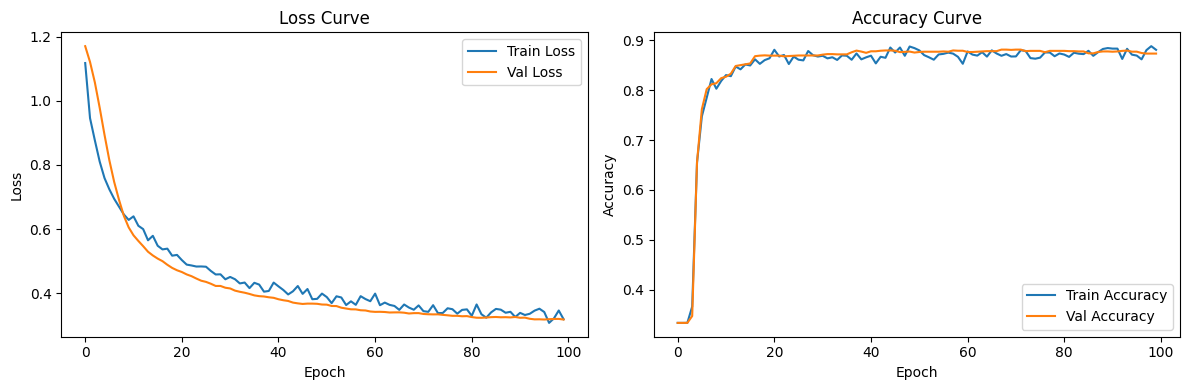

In [169]:
lr=2e-5
weight_decay=1e-1
dropout = 0.1
epochs = 100
factor, patience = 0.1, 10

nn_model = DefaultNeuralNetwork(input_size=vector_size_oh, output_size=num_classes-1, dropout=dropout)
optim = torch.optim.AdamW(nn_model.parameters(), lr=lr, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, patience=patience, factor=factor)

trainer = Trainer(nn_model)
trainer.to_device(device)
trainer.compile(optimizer=optim, criterion=criterion, scheduler=scheduler)

_ = trainer.fit(train_loader_oh, val_loader_oh, epochs=epochs)

## Embedding NN

In [49]:
num_classes, vector_size_ie

(3, 16)

### Learning rate

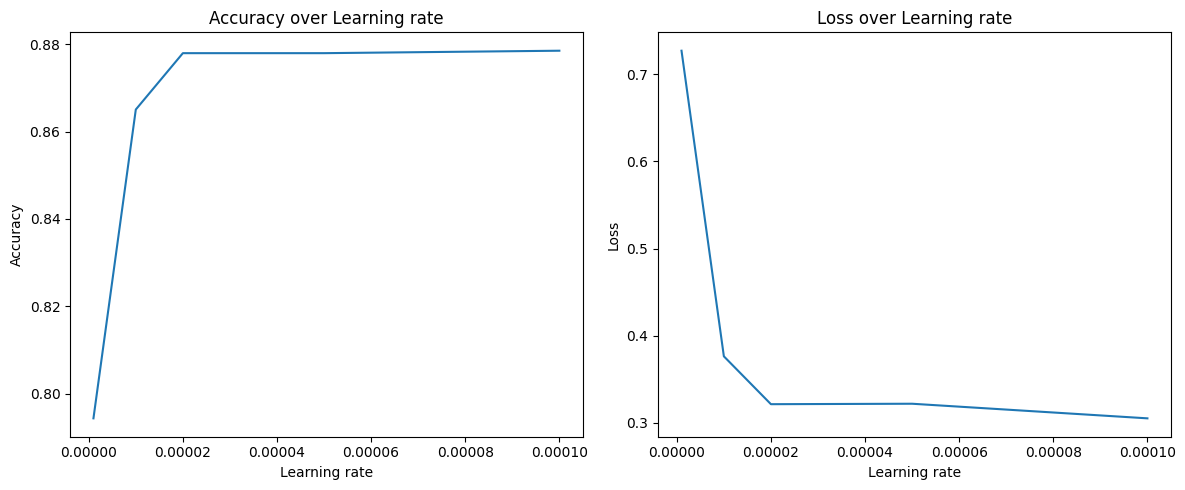

In [52]:
lr_rates = sorted([1e-4, 1e-5, 2e-5, 5e-5, 1e-6])
epochs = 100
weight_decay = 2e-1

criterion = ordinal_loss
results = []

for lr_rate in lr_rates:
    model = EmbeddingNeuralNetwork(base_input_size=vector_size_ie, output_size=num_classes-1, dropout=0.1)
    optim = torch.optim.AdamW(model.parameters(), lr=lr_rate, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, patience=5, factor=0.1)

    trainer = Trainer(model)
    trainer.to_device(device)
    trainer.compile(optimizer=optim, criterion=criterion, scheduler=scheduler)
    trainer.set_verbose(False)

    result = trainer.fit(train_loader_ie, val_loader_ie, epochs=epochs)
    results.append(result)

plot_results_over_params(lr_rates, np.array(results), "Learning rate")

### Weight decay

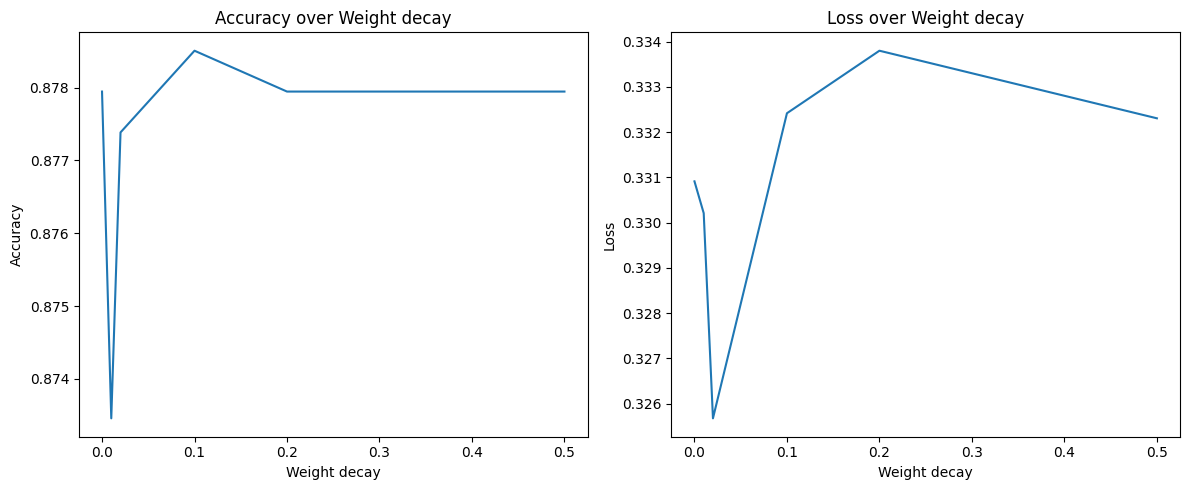

In [54]:
lr = 2e-5 # wyznaczony na podstawie poprzedniego eksperymentu
weight_decays = sorted([0.0, 1e-1, 2e-1, 5e-1, 1e-2, 2e-2])
criterion = ordinal_loss
epochs = 100

results = []

for weight_decay in weight_decays:
    model = EmbeddingNeuralNetwork(base_input_size=vector_size_ie, output_size=num_classes-1, dropout=0.1)
    optim = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, patience=5, factor=0.1)

    trainer = Trainer(model)
    trainer.to_device(device)
    trainer.compile(optimizer=optim, criterion=criterion, scheduler=scheduler)
    trainer.set_verbose(False)

    result = trainer.fit(train_loader_ie, val_loader_ie, epochs=epochs)
    results.append(result)

plot_results_over_params(weight_decays, np.array(results), "Weight decay")

### Dropout

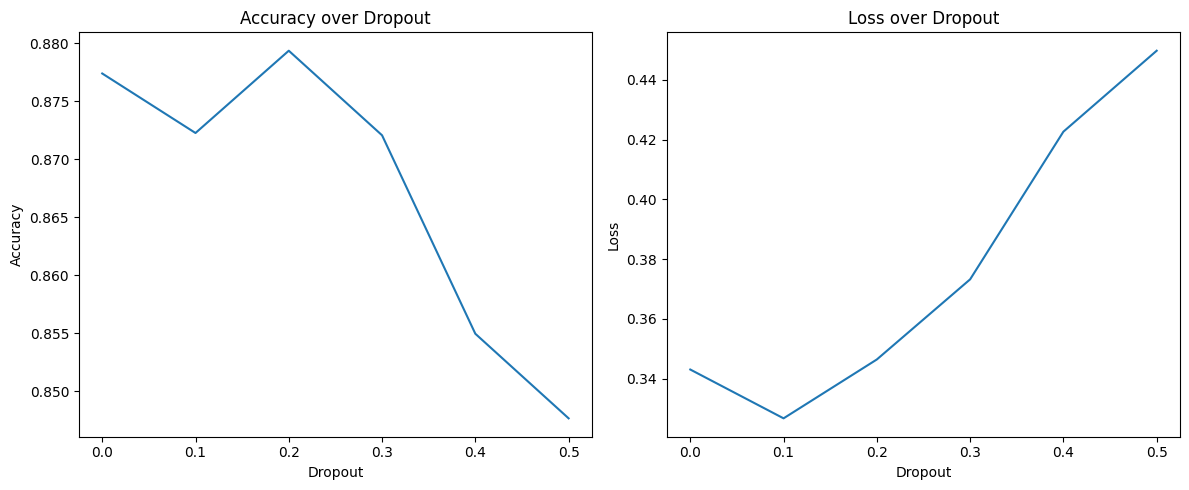

In [55]:
lr=2e-5
weight_decay=1e-1
dropouts = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
epochs = 100

results = []

for dropout in dropouts:
    model = EmbeddingNeuralNetwork(base_input_size=vector_size_ie, output_size=num_classes-1, dropout=dropout)
    optim = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, patience=5, factor=0.1)

    trainer = Trainer(model)
    trainer.to_device(device)
    trainer.compile(optimizer=optim, criterion=criterion, scheduler=scheduler)
    trainer.set_verbose(False)

    result = trainer.fit(train_loader_ie, val_loader_ie, epochs=epochs)
    results.append(result)

plot_results_over_params(dropouts, np.array(results), "Dropout")

### Schedulers

#### ReduceLROnPlateau

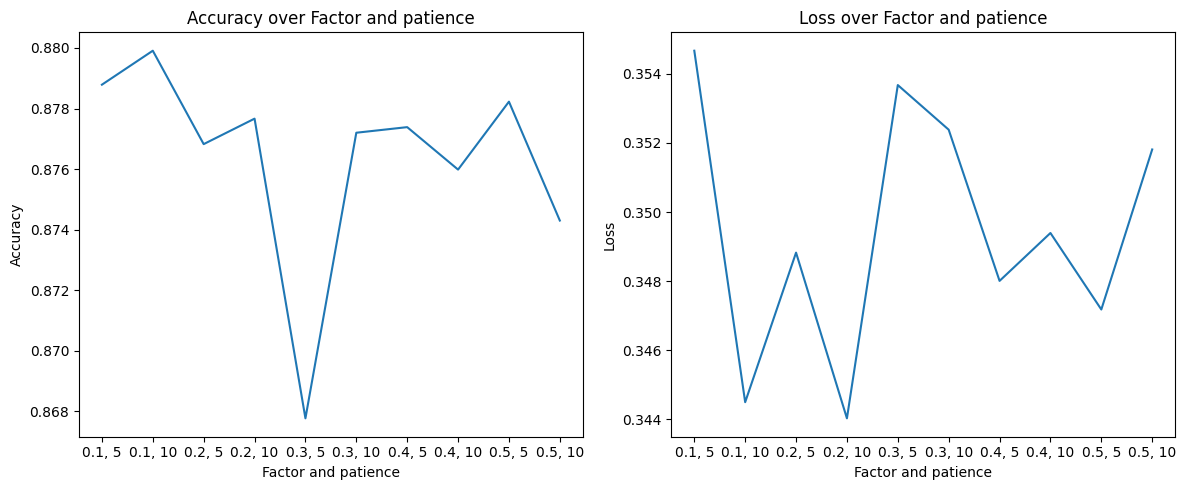

In [57]:
lr=2e-5
weight_decay=1e-1
dropout = 0.2
epochs = 100
factor_patience = [(0.1, 5), (0.1, 10), (0.2, 5), (0.2, 10), (0.3, 5), (0.3, 10), (0.4, 5), (0.4, 10), (0.5, 5), (0.5, 10)]

results = []
for factor, patience in factor_patience:
    model = EmbeddingNeuralNetwork(base_input_size=vector_size_ie, output_size=num_classes-1, dropout=dropout)
    optim = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, patience=patience, factor=factor)

    trainer = Trainer(model)
    trainer.to_device(device)
    trainer.compile(optimizer=optim, criterion=criterion, scheduler=scheduler)
    trainer.set_verbose(False)

    result = trainer.fit(train_loader_ie, val_loader_ie, epochs=epochs)
    results.append(result)

plot_results_over_params([f"{factor}, {patiance}" for factor, patiance in factor_patience], np.array(results), "Factor and patience")

#### StepLR

/Users/grzegorzstatkiewicz/Documents/studies/ssne/.venv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:243: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


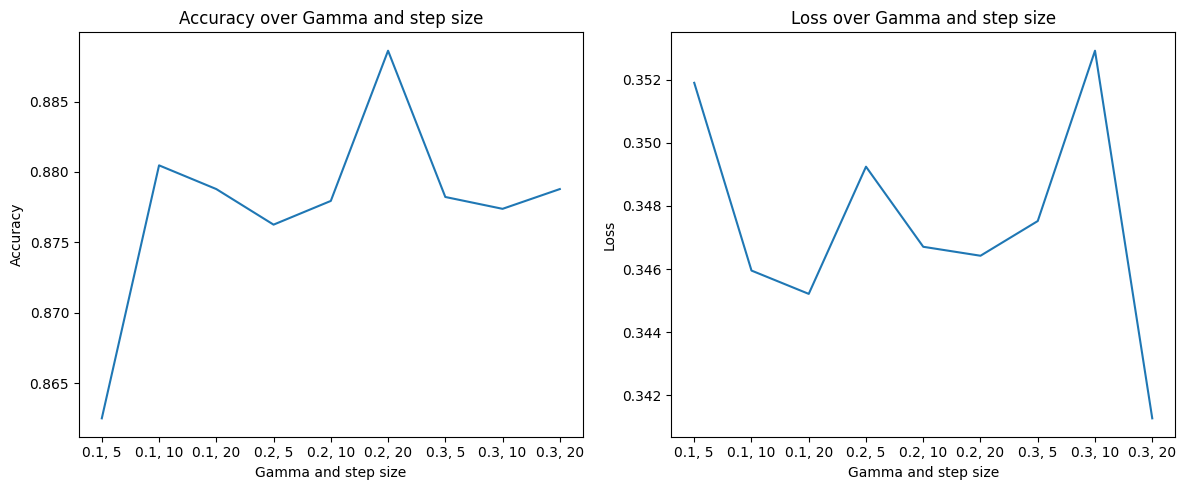

In [171]:
lr = 2e-5
weight_decay = 1e-1
dropout = 0.2
epochs = 100
gamma_step = [(0.1, 5), (0.1, 10), (0.1, 20), (0.2, 5), (0.2, 10), (0.2, 20), (0.3, 5), (0.3, 10), (0.3, 20)]

results = []
for gamma, step_size in gamma_step:
    model = EmbeddingNeuralNetwork(base_input_size=vector_size_ie, output_size=num_classes-1, dropout=dropout)
    optim = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.StepLR(optim, step_size=step_size, gamma=gamma)

    trainer = Trainer(model)
    trainer.to_device(device)
    trainer.compile(optimizer=optim, criterion=criterion, scheduler=scheduler)
    trainer.set_verbose(False)

    result = trainer.fit(train_loader_ie, val_loader_ie, epochs=epochs)
    results.append(result)

plot_results_over_params([f"{gamma}, {step_size}" for gamma, step_size in gamma_step], np.array(results), "Gamma and step size")

### Embedding dimension

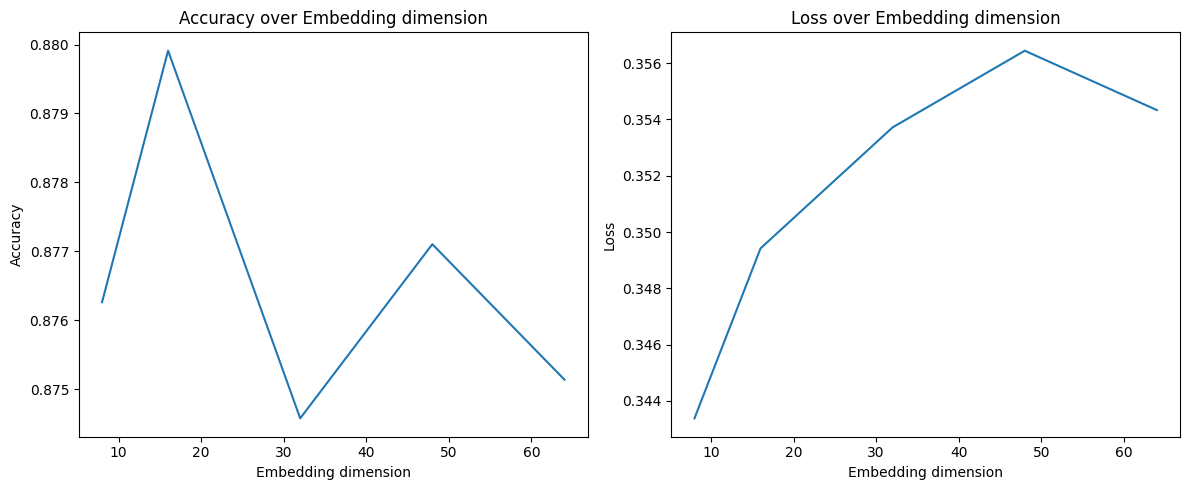

In [158]:
lr=2e-5
weight_decay=1e-1
dropout = 0.2
epochs = 100
embeddings = [8, 16, 32, 48, 64]
factor, patience = 0.1, 10

results = []

for embedding_dim in embeddings:
    model = EmbeddingNeuralNetwork(base_input_size=vector_size_ie, output_size=num_classes-1, dropout=dropout, embedding_dim=embedding_dim)
    optim = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, patience=patience, factor=factor)

    trainer = Trainer(model)
    trainer.to_device(device)
    trainer.compile(optimizer=optim, criterion=criterion, scheduler=scheduler)
    trainer.set_verbose(False)

    result = trainer.fit(train_loader_ie, val_loader_ie, epochs=epochs)
    results.append(result)

plot_results_over_params(embeddings, np.array(results), "Embedding dimension")

### Ordinal loss pos weights

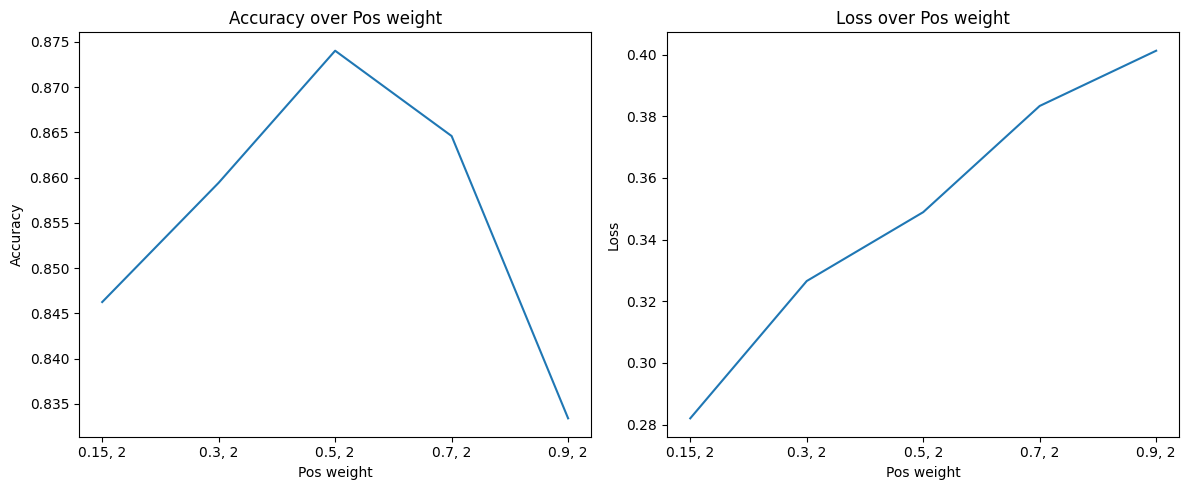

In [160]:
lr=2e-5
weight_decay=1e-1
dropout = 0.2
epochs = 100
embeddings = 16
factor, patience = 0.1, 10
pos_weights = [(0.15, 2), (0.3, 2), (0.5, 2), (0.7, 2), (0.9, 2)]

results = []

for weights in pos_weights:
    model = EmbeddingNeuralNetwork(base_input_size=vector_size_ie, output_size=num_classes-1, dropout=dropout, embedding_dim=embedding_dim)
    optim = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, patience=patience, factor=factor)

    trainer = Trainer(model)
    trainer.to_device(device)
    trainer.compile(optimizer=optim, criterion=lambda preds, targets: ordinal_loss(preds, targets, weights=weights), scheduler=scheduler)
    trainer.set_verbose(False)

    result = trainer.fit(train_loader_ie, val_loader_ie, epochs=epochs)
    results.append(result)

plot_results_over_params([f"{w1}, {w2}" for w1, w2 in pos_weights], np.array(results), "Pos weight")

### Best Embedding NN

Epoch  1/300 - Train Loss: 1.21 - Val Loss: 1.19 - Val Acc: 0.3333 - LR: 1e-05
Epoch  2/300 - Train Loss: 1.17 - Val Loss: 1.18 - Val Acc: 0.3333 - LR: 1e-05
Epoch  3/300 - Train Loss: 1.10 - Val Loss: 1.16 - Val Acc: 0.3333 - LR: 1e-05
Epoch  4/300 - Train Loss: 1.05 - Val Loss: 1.13 - Val Acc: 0.3333 - LR: 1e-05
Epoch  5/300 - Train Loss: 1.02 - Val Loss: 1.09 - Val Acc: 0.3373 - LR: 1e-05
Epoch  6/300 - Train Loss: 0.99 - Val Loss: 1.03 - Val Acc: 0.3406 - LR: 1e-05
Epoch  7/300 - Train Loss: 0.97 - Val Loss: 0.98 - Val Acc: 0.3670 - LR: 1e-05
Epoch  8/300 - Train Loss: 0.91 - Val Loss: 0.93 - Val Acc: 0.4237 - LR: 1e-05
Epoch  9/300 - Train Loss: 0.91 - Val Loss: 0.89 - Val Acc: 0.4770 - LR: 1e-05
Epoch 10/300 - Train Loss: 0.90 - Val Loss: 0.85 - Val Acc: 0.5379 - LR: 1e-05
Epoch 11/300 - Train Loss: 0.86 - Val Loss: 0.82 - Val Acc: 0.5690 - LR: 1e-05
Epoch 12/300 - Train Loss: 0.86 - Val Loss: 0.80 - Val Acc: 0.6529 - LR: 1e-05
Epoch 13/300 - Train Loss: 0.83 - Val Loss: 0.78 - V

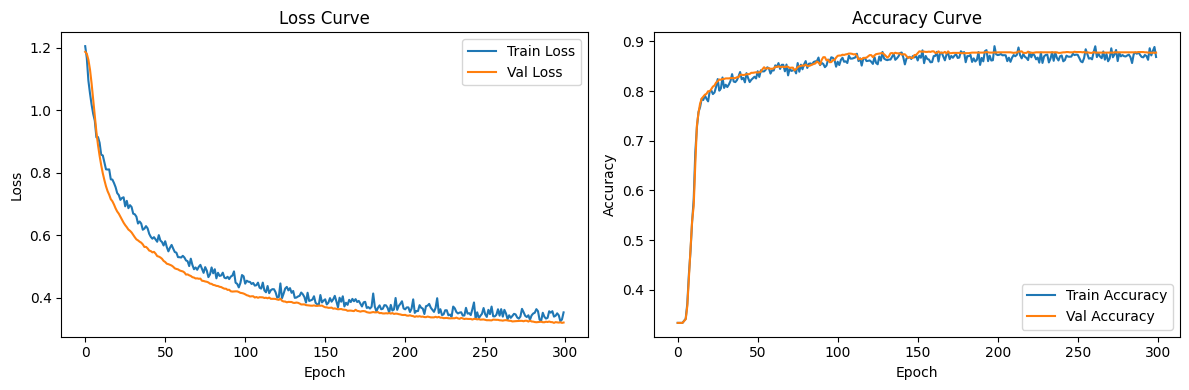

In [161]:
lr=1e-5
weight_decay=1e-1
dropout = 0.2
epochs = 300
factor, patience = 0.1, 10
embedding_dim = 16
pos_weight = (0.5, 2)

embedding_model = EmbeddingNeuralNetwork(base_input_size=vector_size_ie, output_size=num_classes-1, dropout=dropout, embedding_dim=embedding_dim)
optim = torch.optim.AdamW(embedding_model.parameters(), lr=lr, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, patience=patience, factor=factor)

trainer = Trainer(embedding_model)
trainer.to_device(device)
trainer.compile(optimizer=optim, criterion=lambda preds, targets: ordinal_loss(preds, targets, weights=pos_weight), scheduler=scheduler)

_ = trainer.fit(train_loader_ie, val_loader_ie, epochs=epochs)

# Evaluation

In [162]:
from train import predict

y_pred = predict(embedding_model, X_val_ie, device)

### Accuracy curve

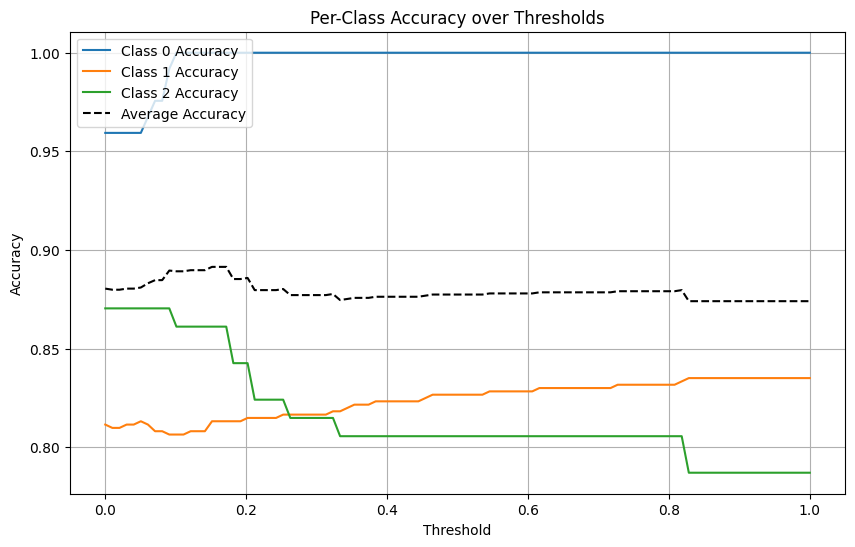

In [163]:
from plots import plot_acc_over_thresholds

plot_acc_over_thresholds(y_val, y_pred_nn)
plot_acc_over_thresholds(y_val, y_pred_embd)

### Threshold tuning

In [164]:
from utils import pred_to_class


pred_class_nn = pred_to_class(y_pred_nn, threshold=(0.5, 0.5)).numpy()
pred_class_embd = pred_to_class(y_pred_embd, threshold=(0.5, 0.5)).numpy()

### Accuracy per class

Class 0 accuracy: 0.96
Class 1 accuracy: 0.81
Class 2 accuracy: 0.87
Average class accuracy: 0.88


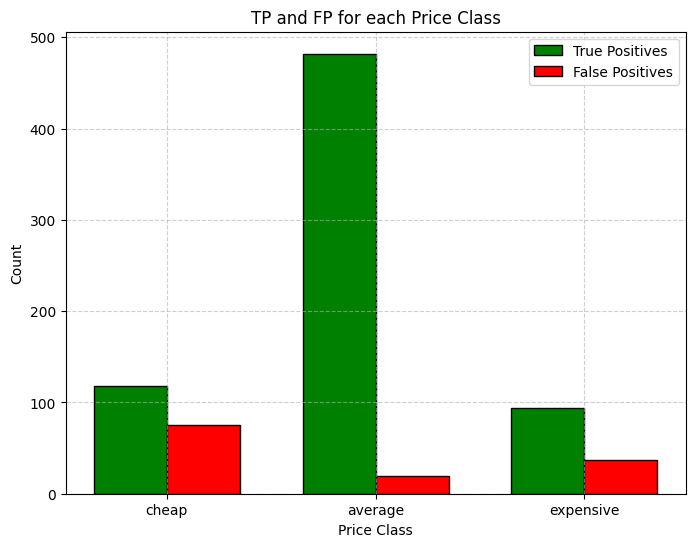

In [165]:
from plots import plot_pred_acc


print("model accuracy with no embedding: ")
plot_pred_acc(y_val, pred_class_nn)
print("model accuracy with embedding: ")
plot_pred_acc(y_val, pred_class_embd)

### Confusion matrix

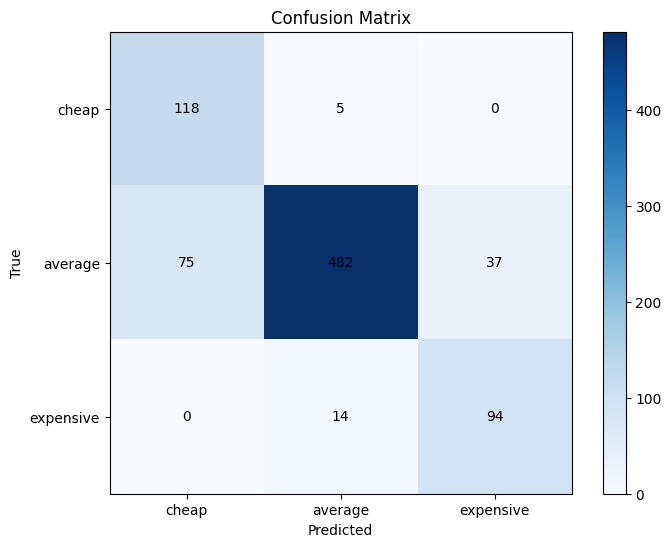

In [166]:
from plots import plot_confusion_matrix

plot_confusion_matrix(y_val, pred_class_nn)
plot_confusion_matrix(y_val, pred_class_embd)

# Save results

In [167]:
from train import save_results

test_results = save_results(embedding_model, X_test_ie, device=device)

test_results.value_counts().sort_index()

0
0     385
1    1101
2     281
Name: count, dtype: int64